In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import h5py
import os
import tqdm
import scipy
from scipy import signal
from tqdm import tnrange
import seaborn as sns
from scipy.stats import norm,entropy,linregress
from scipy.optimize import minimize, curve_fit
from scipy.io import savemat
import multiprocess as mp
from multiprocess import Pool
from scipy.special import erf
import sys
import warnings
warnings.filterwarnings('ignore')

cmap = plt.rcParams['axes.prop_cycle'].by_key()['color']
modulename = 'multiprocess'

mpl.rcParams['svg.fonttype'] = 'none'
sns.set_context('poster', font_scale=1.1)

import odor_breathing_functions
import functions_beh

#path = os.getcwd() + '/Session/'
savepath = os.getcwd() + '/Figures/test/'
savepath_pdf = os.getcwd() + '/Figures/test/pdf/'
savepath_png = os.getcwd() + '/Figures/test/png/'
savepath_svg = os.getcwd() + '/Figures/test/svg/'

#dir_list = os.listdir(path)
#np_savepath = os.getcwd() + '/Other_outputs/MLE_arrays/'

#print(os.getcwd())


In [2]:
animal_list = [['Tabby'],
               ['Bengal'],
               ['Shorthair'],
               ['Banner'],
               ['Natasha'],
               ['Stark'],
               ['Peterparker']]

c_2 = plt.cm.get_cmap('RdPu')
cmap = plt.get_cmap("tab10")
cmap_2 = sns.color_palette("rocket", 7)
cmap_3 = sns.color_palette("mako", 7)
cmap_4 = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)(np.linspace(0, 0.75, len(animal_list)))
cmap_5 = sns.color_palette("rocket_r", as_cmap=True)(np.linspace(0.1, 0.8, len(animal_list)))
cmap_6 = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)(np.linspace(0, 0.8, 5))
cmap_7 = sns.color_palette("YlGn", 10)
cmap_8 = sns.color_palette("bone_r", 10)
cmap_9 = sns.color_palette("Accent", 12)
cmap_10 = sns.color_palette('bright',10)
cmap_11 = sns.color_palette('plasma',10)

greys = sns.color_palette("Greys", 10)
colors = plt.cm.get_cmap('BuGn')(np.linspace(0.4, 1, len(animal_list)))
blue_palette = sns.dark_palette(cmap(0),n_colors=9, reverse=True)
orange_palette = sns.dark_palette(cmap(1),n_colors=9, reverse=True)
red_palette = sns.dark_palette(cmap(3),n_colors=9, reverse=True)

cmap_12 = sns.choose_dark_palette()
glom_palette = sns.cubehelix_palette(start=0, hue = .9, light = 0.8, dark=0.15, gamma=0.9, rot=-0.4, as_cmap=True)
glom_palette_2 = sns.cubehelix_palette(n_colors=18, start=0, hue = .9, light = 0.8, dark=0.15, gamma=0.9, rot=-0.4)#, as_cmap=True)
wistia_palette = sns.color_palette('Wistia', 10)
glom_p = glom_palette_2[::-1]

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

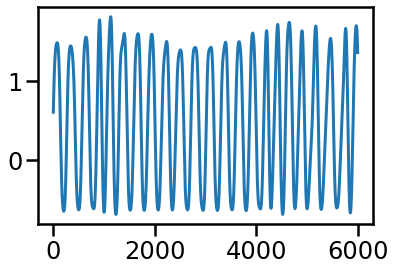

In [6]:
with h5py.File('./adaptation_data_HW1_50ms_struct-003.mat', 'r') as f:
    breath = f['imaging_struct/breath'][:]
    odor = f['imaging_struct/odor'][:]
    valve = f['imaging_struct/valve'][:]
    df_data = f['imaging_struct/df_data'][:]

sniff = odor_breathing_functions.butter_lowpass_filter(breath.flatten(),10,1000,3)
sniff = (sniff - sniff.mean()+1)/2
plt.plot(sniff[852000:858000])

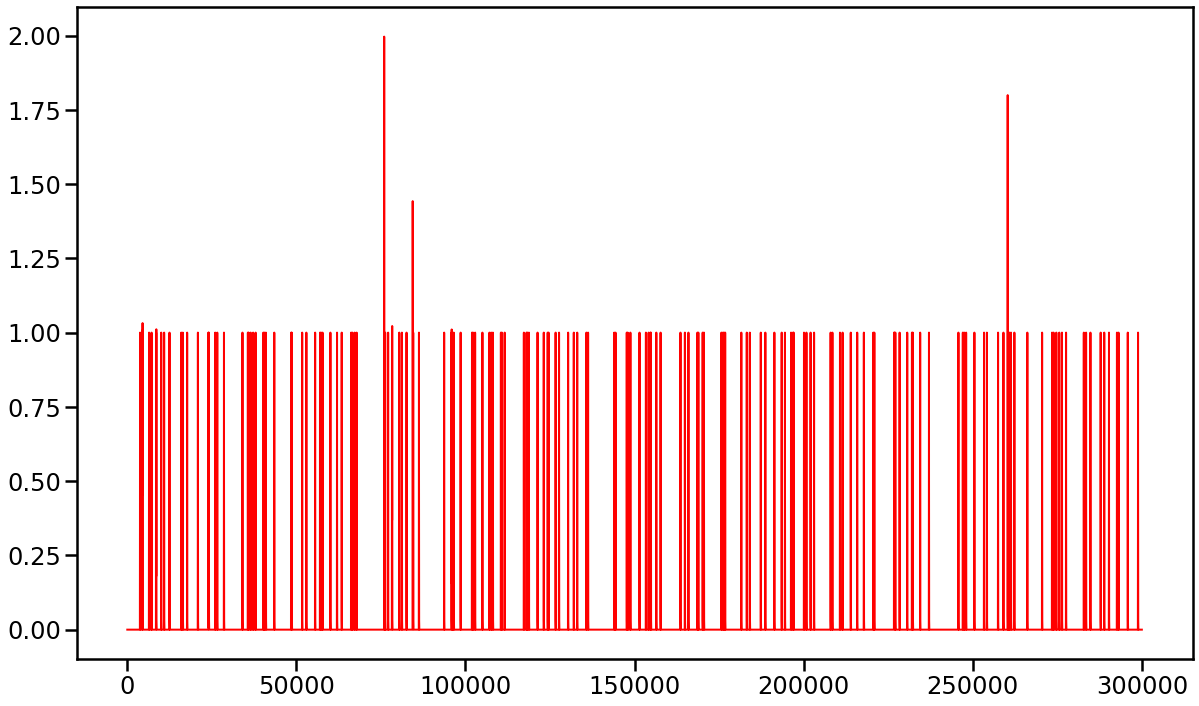

In [7]:
fig, ax1 = plt.subplots(figsize=(20,12))

#ax1.plot(sniff[1100000:1160000])
ax1.plot(odor[860000:1160000], linewidth=2, color='r')

#ax2 = ax1.twinx()
#ax2.plot(valve[1133500:1138500], color='g')
#plt.xlim(340,440)

# fig.savefig(savepath_svg + 'rep_traces_odor_large.svg',transparent=True, format='svg', bbox_inches='tight')
# fig.savefig(savepath_png + 'rep_traces_odor_large.png',transparent=True, format='png', bbox_inches='tight')
# fig.savefig(savepath_pdf + 'rep_traces_odor_large.pdf',transparent=True, format='pdf', bbox_inches='tight')

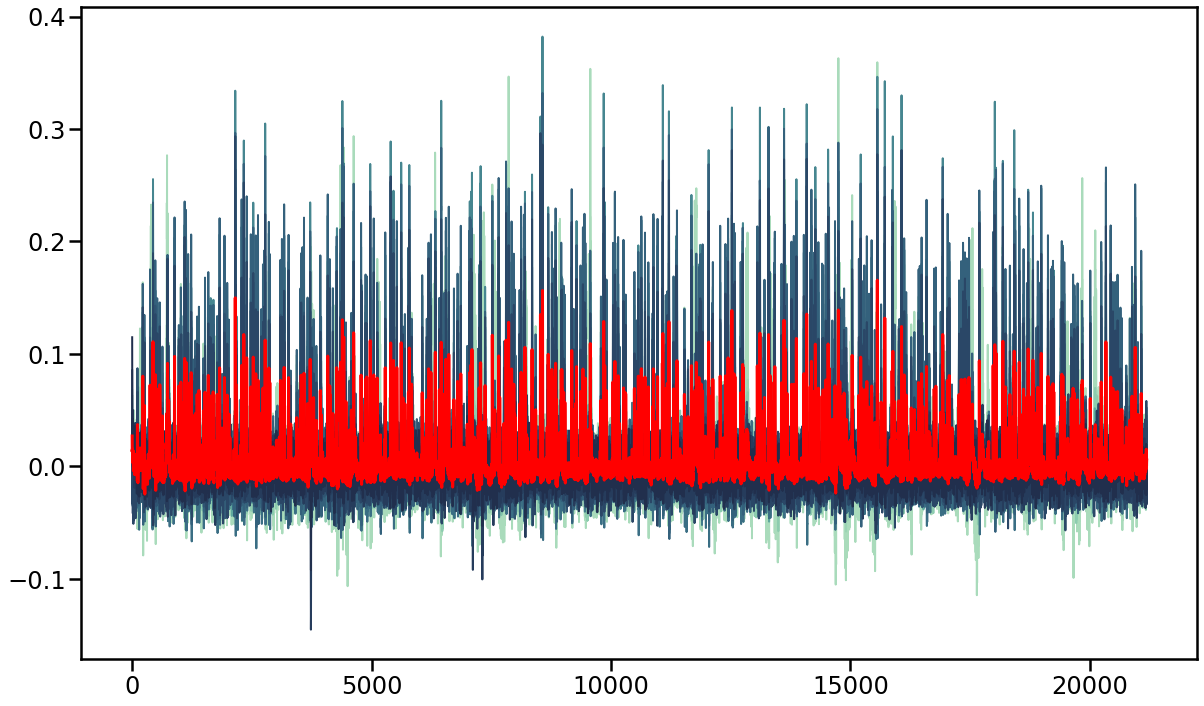

In [11]:
fig, ax = plt.subplots(figsize=(20,12))

for i in range(df_data.shape[1]):

    plt.plot(df_data[:, i], color=glom_palette_2[i], linewidth=2)

plt.plot(df_data.mean(1)[:], color='red', linewidth=3) #cmap_7[4]

# fig.savefig(savepath_svg + 'rep_traces_calcium_reduced.svg',transparent=True, format='svg', bbox_inches='tight')
# fig.savefig(savepath_png + 'rep_traces_calcium_reduced.png',transparent=True, format='png', bbox_inches='tight')
# fig.savefig(savepath_pdf + 'rep_traces_calcium_reduced.pdf',transparent=True, format='pdf', bbox_inches='tight')

dict_keys(['__header__', '__version__', '__globals__', 'HW1_mid', 'HW1_onset', 'HW1_peak', 'HW4_mid', 'HW4_onset', 'HW4_peak', 'Sphinx_mid', 'Sphinx_onset', 'Sphinx_peak'])
(18, 15)
dict_keys(['__header__', '__version__', '__globals__', 'HW1_mid', 'HW1_onset', 'HW1_peak', 'HW4_mid', 'HW4_onset', 'HW4_peak', 'Sphinx_mid', 'Sphinx_onset', 'Sphinx_peak'])
(53, 15)
dict_keys(['__header__', '__version__', '__globals__', 'HW1_mid', 'HW1_onset', 'HW1_peak', 'HW4_mid', 'HW4_onset', 'HW4_peak', 'Sphinx_mid', 'Sphinx_onset', 'Sphinx_peak'])
(35, 15)


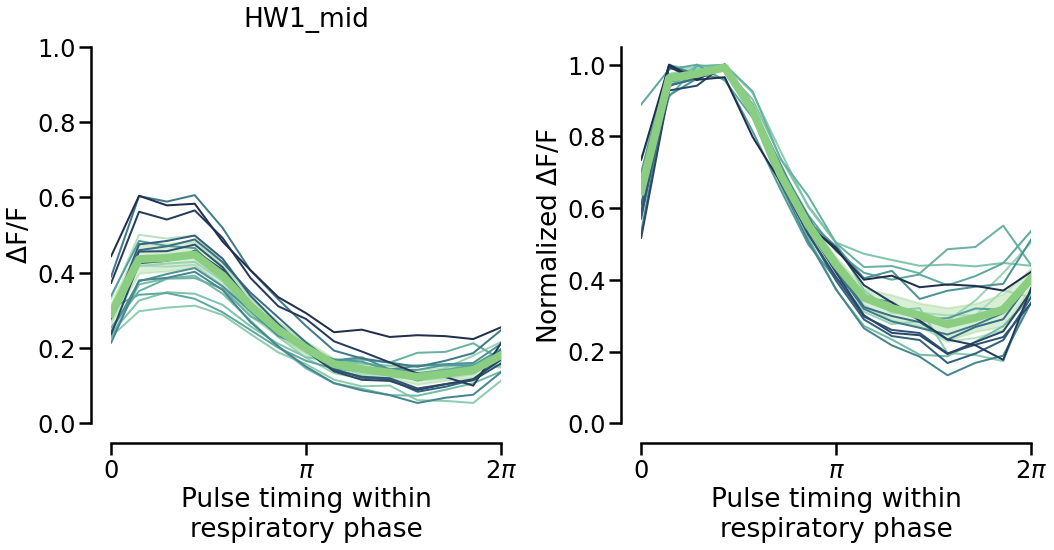

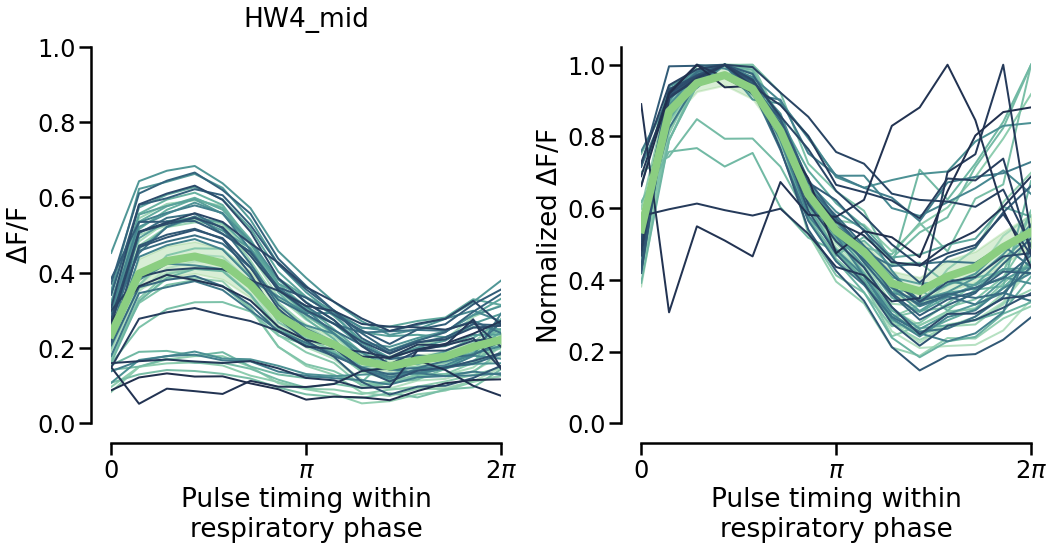

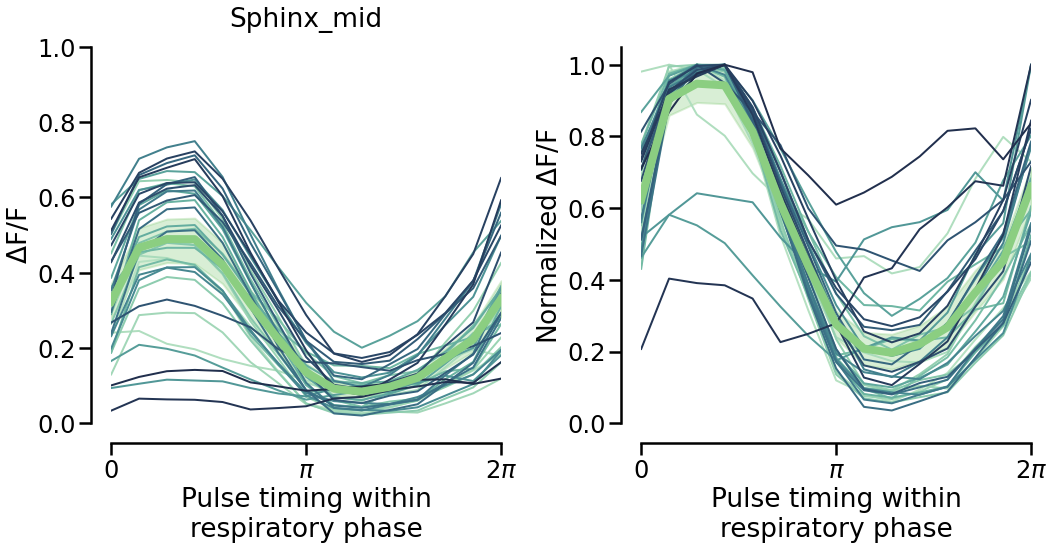

In [12]:
matlab_filepath = os.getcwd() + '/Kernel_workspace.mat'

def phase_transform(x):
    return (0+((x-1)*(2*np.pi-0)/(14)))

def calcium_kernel(matlab_filepath, table_name):
    file = scipy.io.loadmat(matlab_filepath)
    print(file.keys())
    glom_matrix = file[table_name]
    print(glom_matrix.shape)
    kernel_mean = glom_matrix.mean(0)
    kernel_std = glom_matrix.std(0)  
    norm_glom_matrix = np.ones_like(glom_matrix)
    colx = [i for i in range(1,16)]  

    for i in range(glom_matrix.shape[0]):
        norm_glom_matrix[i,:] = glom_matrix[i,:]/glom_matrix[i,:].max()

    df_g = pd.DataFrame(glom_matrix, columns=colx)
    df_g.insert(0, 'Glom', np.arange(0,len(glom_matrix)))
    df_g2 = df_g.melt(id_vars='Glom', var_name='Bin', value_name='dF_F')
    df_g2['Breathing phase'] = df_g2['Bin'].apply(phase_transform)
    df_g2['Animal'] = table_name

  
    df_gn = pd.DataFrame(norm_glom_matrix, columns=colx)
    df_gn.insert(0, 'Glom', np.arange(0,len(norm_glom_matrix)))
    df_gn2 = df_gn.melt(id_vars='Glom', var_name='Bin', value_name='dF_F')
    df_gn2['Breathing phase'] = df_gn2['Bin'].apply(phase_transform)
    df_gn2['Animal'] = table_name
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

    sns.lineplot(x=df_g2['Breathing phase'], y=df_g2['dF_F'], hue=df_g2['Glom'], legend=False, 
             palette=glom_palette, linewidth=2, clip_on=True, ax=ax1)
    
    sns.lineplot(x=df_g2['Breathing phase'], y=df_g2['dF_F'], errorbar=('ci'),
                 color=cmap_7[4], linewidth=8, ax=ax1, err_kws={'alpha':0.33}) #wistia_palette[1]
    
    ax1.set_xticks([0,np.pi,2*np.pi])
    ax1.set_xticklabels(['0','$\pi$','$2\pi$'])
    ax1.set_xlim(0,2*np.pi)
    ax1.set_ylim(0,1)
    ax1.set_ylabel('$\Delta $F/F',)
    ax1.set_xlabel('Pulse timing within\nrespiratory phase')
    ax1.set_title(table_name, pad=20)

    sns.despine(offset=20)

    sns.lineplot(x=df_gn2['Breathing phase'], y=df_gn2['dF_F'], hue=df_g2['Glom'], legend=False, 
             palette=glom_palette, linewidth=2, clip_on=True, ax=ax2) #sns.color_palette("mako", as_cmap=True)
    
    sns.lineplot(x=df_gn2['Breathing phase'], y=df_gn2['dF_F'], errorbar=('ci'),
                 color=cmap_7[4], linewidth=8, ax=ax2, err_kws={'alpha':0.33})

    ax2.set_xticks([0,np.pi,2*np.pi])
    ax2.set_xticklabels(['0','$\pi$','$2\pi$'])
    ax2.set_xlim(0,2*np.pi)
    ax2.set_ylim(0,1.05)
    ax2.set_ylabel('Normalized $\Delta $F/F')
    ax2.set_xlabel('Pulse timing within\nrespiratory phase')
    sns.despine(offset=20)
    plt.tight_layout(pad=2)

    return fig, df_g2, df_gn2

fig_hw1, table_hw1, table_hw1_norm =  calcium_kernel(matlab_filepath, 'HW1_mid')
fig_hw4, table_hw4, table_hw4_norm =  calcium_kernel(matlab_filepath, 'HW4_mid')
fig_sphinx, table_sphinx, table_sphinx_norm =  calcium_kernel(matlab_filepath, 'Sphinx_mid')

# fig_hw1.savefig(savepath_svg + 'all_glomerular_weights_hw1_peak.svg', transparent=True, format='svg', bbox_inches='tight')
# fig_hw1.savefig(savepath_png + 'all_glomerular_weights_hw1_peak.png', transparent=True, format='png', bbox_inches='tight')
# fig_hw1.savefig(savepath_pdf + 'all_glomerular_weights_hw1_peak.pdf', transparent=True, format='pdf', bbox_inches='tight')

# fig_hw4.savefig(savepath_svg + 'all_glomerular_weights_hw4_peak.svg', transparent=True, format='svg', bbox_inches='tight')
# fig_hw4.savefig(savepath_png + 'all_glomerular_weights_hw4_peak.png', transparent=True, format='png', bbox_inches='tight')
# fig_hw4.savefig(savepath_pdf + 'all_glomerular_weights_hw4_peak.pdf', transparent=True, format='pdf', bbox_inches='tight')

# fig_sphinx.savefig(savepath_svg + 'all_glomerular_weights_sphinx_peak.svg', transparent=True, format='svg', bbox_inches='tight')
# fig_sphinx.savefig(savepath_png + 'all_glomerular_weights_sphinx_peak.png', transparent=True, format='png', bbox_inches='tight')
# fig_sphinx.savefig(savepath_pdf + 'all_glomerular_weights_sphinx_peak.pdf', transparent=True, format='pdf', bbox_inches='tight')

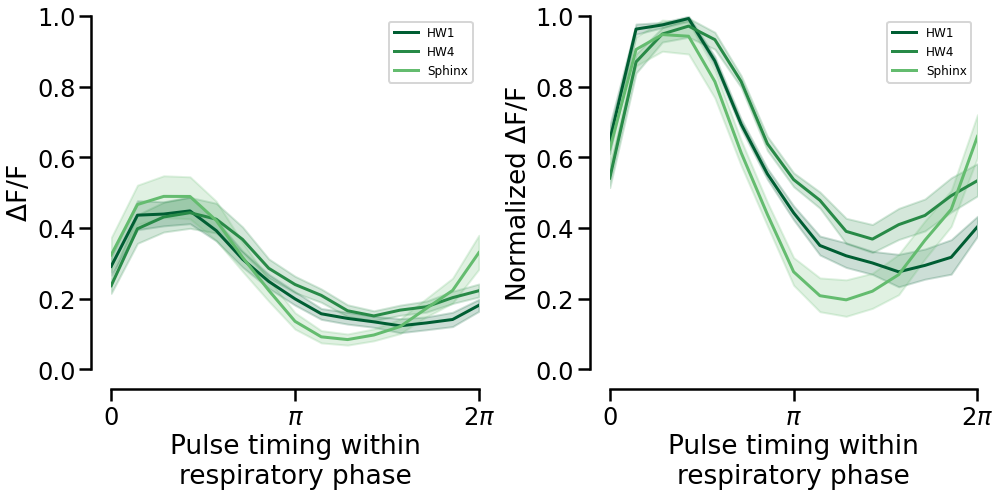

In [13]:
calcium_data_combined = pd.concat([table_hw1, table_hw4, table_sphinx], axis=0).reset_index(drop=True)
calcium_normalized = pd.concat([table_hw1_norm, table_hw4_norm, table_sphinx_norm], axis=0).reset_index(drop=True)

fig_avg, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

plot1 = sns.lineplot(x=calcium_data_combined['Breathing phase'], 
             y=calcium_data_combined['dF_F'], 
             hue=calcium_data_combined['Animal'],
             palette=cmap_7[-1::-2], ax=ax1)

handles, labels = plot1.get_legend_handles_labels()

handlex = [h for h, l in zip(handles, labels) if 'Animal' in l]
labelx = ['HW1', 'HW4', 'Sphinx']

plot1.legend(handles=handles, labels=labelx, fontsize='large')
plot1.set_xticks([0,np.pi,2*np.pi])
plot1.set_xticklabels(['0','$\pi$','$2\pi$'])
plot1.set_xlim(0,2*np.pi)
plot1.set_ylim(0,1)
plot1.set_ylabel('$\Delta $F/F',)
plot1.set_xlabel('Pulse timing within\nrespiratory phase')

sns.despine(offset=20)


plot2 = sns.lineplot(x=calcium_normalized['Breathing phase'], 
             y=calcium_normalized['dF_F'], 
             hue=calcium_normalized['Animal'],
             palette=cmap_7[-1::-2], ax=ax2, legend=False)

plot2.legend(handles=handles, labels=labelx, fontsize='large')

plot2.set_xticks([0,np.pi,2*np.pi])
plot2.set_xticklabels(['0','$\pi$','$2\pi$'])
plot2.set_xlim(0,2*np.pi)
plot2.set_ylim(0,1)
plot2.set_ylabel('Normalized $\Delta $F/F',)
plot2.set_xlabel('Pulse timing within\nrespiratory phase')

# fig_avg.savefig(savepath_svg + 'avg_glomerular_weights_all_animals_peak.svg', transparent=True, format='svg', bbox_inches='tight')
# fig_avg.savefig(savepath_png + 'avg_glomerular_weights_all_animals_peak.png', transparent=True, format='png', bbox_inches='tight')
# fig_avg.savefig(savepath_pdf + 'avg_glomerular_weights_all_animals_peak.pdf', transparent=True, format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

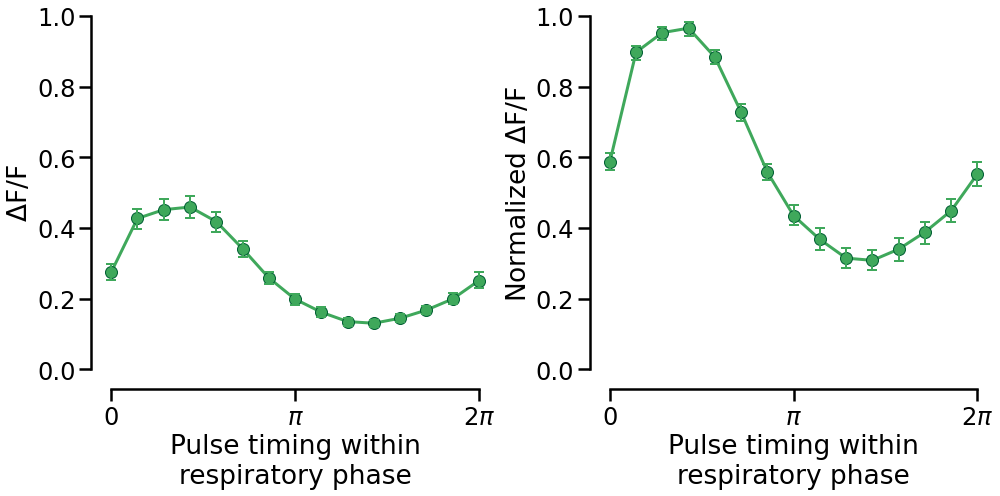

In [26]:
fig_kernel, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

plot1 = sns.lineplot(x=calcium_data_combined['Breathing phase'], 
             y=calcium_data_combined['dF_F'], ax=ax1, marker="o", dashes=False, markersize=12, 
             err_style='bars', legend=False, err_kws={'capsize':5,'capthick':2,'elinewidth':2,'clip_on':False},
             color=cmap_7[6], markeredgewidth=1, markerfacecolor=cmap_7[6],markeredgecolor=cmap_7[9], clip_on=False)

plot2 = sns.lineplot(x=calcium_normalized['Breathing phase'], 
             y=calcium_normalized['dF_F'], ax=ax2, marker="o", dashes=False, markersize=12, 
             err_style='bars', errorbar='ci', legend=False, err_kws={'capsize':5,'capthick':2,'elinewidth':2, 'clip_on':False},
             color=cmap_7[6], markeredgewidth=1, markerfacecolor=cmap_7[6],markeredgecolor=cmap_7[9], clip_on=False)

plot1.set_xticks([0,np.pi,2*np.pi])
plot1.set_xticklabels(['0','$\pi$','$2\pi$'])
plot1.set_xlim(0,2*np.pi)
plot1.set_ylim(0,1)
plot1.set_ylabel('$\Delta $F/F',)
plot1.set_xlabel('Pulse timing within\nrespiratory phase')
sns.despine(offset=20)

plot2.set_xticks([0,np.pi,2*np.pi])
plot2.set_xticklabels(['0','$\pi$','$2\pi$'])
plot2.set_xlim(0,2*np.pi)
plot2.set_ylim(0,1)
plot2.set_ylabel('Normalized $\Delta $F/F' ,)
plot2.set_xlabel('Pulse timing within\nrespiratory phase')

plt.tight_layout()

# fig_kernel.savefig(savepath_svg + 'calcium_kernel_average_peak.svg', transparent=True, format='svg', bbox_inches='tight')
# fig_kernel.savefig(savepath_png + 'calcium_kernel_average_peak.png', transparent=True, format='png', bbox_inches='tight')
# fig_kernel.savefig(savepath_pdf + 'calcium_kernel_average_peak.pdf', transparent=True, format='pdf', bbox_inches='tight')

plt.show()

In [27]:
def  kernel_mean_confidence_interval(x):
    mean =  np.mean(x)
    sem = scipy.stats.sem(x)
    conf_interval = sem * scipy.stats.t.ppf((1+0.95)/2.,len(x)-1)
    return mean, mean-conf_interval, mean + conf_interval

calcium_normalized.groupby(['Bin', 'Breathing phase'])['dF_F'].agg(mean='mean',
                                                                   ci_lower=lambda x:kernel_mean_confidence_interval(x)[1],
                                                                   ci_upper=lambda x:kernel_mean_confidence_interval(x)[2])

,,mean,ci_lower,ci_upper
Bin,Breathing phase,,,
1,0.000000,0.586577,0.561703,0.611452
2,0.448799,0.897176,0.876489,0.917862
3,0.897598,0.952588,0.933874,0.971302
4,1.346397,0.965324,0.944502,0.986145
5,1.795196,0.883417,0.862106,0.904729
6,2.243995,0.727575,0.704561,0.750589
7,2.692794,0.557841,0.534885,0.580797
8,3.141593,0.434660,0.406359,0.462961
9,3.590392,0.367383,0.336119,0.398647


In [28]:
calcium_normalized.to_pickle('df_calcium_normalized.pkl')

In [ ]:
matlab_filepath = os.getcwd() + '/Kernel_workspace.mat'
